<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev3/S10/EVA4_S10_Solution_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session9 : CIFAR 10

**Target**: 


*   Move your last code's transformations to Albumentations. Apply ToTensor, HorizontalFlip, Normalize (at min) + More (for additional points)
Please make sure that your test_transforms are simple and only using ToTensor and Normalize
*   Implement GradCam function as a module. 
Your final code (notebook file) must use imported functions to implement transformations and GradCam functionality
*   Target Accuracy is 87%
*   Submit answers to S9-Assignment-Solution. 

**Results**

*  Total Parameters = 
*  After 10 Epochs, Final Train Accuracy = 
*  After 10 Epochs, Final Test Accuracy =

**Analysis**

*  Target accuracy > 87% using Reset18 architecture. Model performance is good as train and test accuracy is small.

## 1. Loading Module and Models 

In [1]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!rm -rf EVA4
!git clone -b rev3 https://github.com/sujitojha1/EVA4 -q --quiet
print("Loaded EVA4 Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA4 Modules and Models
     |████████████████████████████████| 634kB 2.8MB/s 



## 2. Loading train and test data with transforms and loader functions

In [2]:
from EVA4.Modules import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

  pip install torch-lr-finder -v --global-option="amp"


CUDA availability ? True


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [3]:
cifar10.data_summary_stats()
#print(vars(train))

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### 3.2 Plotting sample images

# The Model

In [4]:
from EVA4.Models import *

# Loading ResNet18 Model
net = ResNet18()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [5]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Define a Loss function and optimizer

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


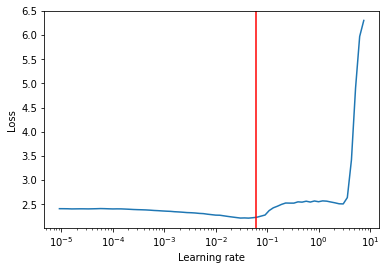

In [10]:
from EVA4.Modules import LRFinder
import torch.optim as optim

model = net
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-6, weight_decay=1e-2,momentum=0.9)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot(show_lr=0.06) # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial stat

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.06, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.1)

# Training and Testing

In [12]:
# Load train and test model
from EVA4.Modules import *

train = train()
test = test()

for epoch in range(50):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    test.execute(net, device, testloader, criterion)
    scheduler.step(train.train_losses[-1])

print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 0


Loss=1.5980126857757568 Batch_id=390 Accuracy=36.25: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0115, Accuracy: 4703/10000 (47.03%)


Epoch: 1


Loss=1.410217523574829 Batch_id=390 Accuracy=50.90: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0098, Accuracy: 5664/10000 (56.64%)


Epoch: 2


Loss=1.1020574569702148 Batch_id=390 Accuracy=58.59: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 6439/10000 (64.39%)


Epoch: 3


Loss=1.1301534175872803 Batch_id=390 Accuracy=63.51: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6598/10000 (65.98%)


Epoch: 4


Loss=0.8901670575141907 Batch_id=390 Accuracy=67.67: 100%|██████████| 391/391 [02:41<00:00,  2.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7275/10000 (72.75%)


Epoch: 5


Loss=0.6948541402816772 Batch_id=390 Accuracy=70.83: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7426/10000 (74.26%)


Epoch: 6


Loss=0.882926344871521 Batch_id=390 Accuracy=73.60: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7652/10000 (76.52%)


Epoch: 7


Loss=0.6317722797393799 Batch_id=390 Accuracy=75.75: 100%|██████████| 391/391 [02:41<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 7981/10000 (79.81%)


Epoch: 8


Loss=0.6406980752944946 Batch_id=390 Accuracy=77.14: 100%|██████████| 391/391 [02:41<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7821/10000 (78.21%)


Epoch: 9


Loss=0.5544638633728027 Batch_id=390 Accuracy=78.67: 100%|██████████| 391/391 [02:41<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8355/10000 (83.55%)


Epoch: 10


Loss=0.551690936088562 Batch_id=390 Accuracy=79.85: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8327/10000 (83.27%)


Epoch: 11


Loss=0.5490068793296814 Batch_id=390 Accuracy=81.24: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8310/10000 (83.10%)


Epoch: 12


Loss=0.5177244544029236 Batch_id=390 Accuracy=81.73: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8537/10000 (85.37%)


Epoch: 13


Loss=0.6362520456314087 Batch_id=390 Accuracy=82.69: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8476/10000 (84.76%)


Epoch: 14


Loss=0.6181339025497437 Batch_id=390 Accuracy=83.54: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8723/10000 (87.23%)


Epoch: 15


Loss=0.4878717362880707 Batch_id=390 Accuracy=84.39: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8542/10000 (85.42%)


Epoch: 16


Loss=0.422670841217041 Batch_id=390 Accuracy=84.72: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8746/10000 (87.46%)


Epoch: 17


Loss=0.2946038842201233 Batch_id=390 Accuracy=85.56: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8694/10000 (86.94%)


Epoch: 18


Loss=0.36423686146736145 Batch_id=390 Accuracy=86.04: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8693/10000 (86.93%)


Epoch: 19


Loss=0.49699658155441284 Batch_id=390 Accuracy=86.53: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8741/10000 (87.41%)


Epoch: 20


Loss=0.43054717779159546 Batch_id=390 Accuracy=86.98: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8681/10000 (86.81%)


Epoch: 21


Loss=0.5342594385147095 Batch_id=390 Accuracy=87.48: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8761/10000 (87.61%)


Epoch: 22


Loss=0.20683684945106506 Batch_id=390 Accuracy=87.90: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8823/10000 (88.23%)


Epoch: 23


Loss=0.31829923391342163 Batch_id=390 Accuracy=88.10: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8855/10000 (88.55%)


Epoch: 24


Loss=0.45999836921691895 Batch_id=390 Accuracy=88.77: 100%|██████████| 391/391 [02:39<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8872/10000 (88.72%)


Epoch: 25


Loss=0.3514633774757385 Batch_id=390 Accuracy=89.08: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8894/10000 (88.94%)


Epoch: 26


Loss=0.310701459646225 Batch_id=390 Accuracy=89.41: 100%|██████████| 391/391 [02:39<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8825/10000 (88.25%)


Epoch: 27


Loss=0.3152656555175781 Batch_id=390 Accuracy=89.36: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8899/10000 (88.99%)


Epoch: 28


Loss=0.3541443943977356 Batch_id=390 Accuracy=89.94: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8962/10000 (89.62%)


Epoch: 29


Loss=0.2284075766801834 Batch_id=390 Accuracy=90.23: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8964/10000 (89.64%)


Epoch: 30


Loss=0.293741375207901 Batch_id=390 Accuracy=90.38: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8966/10000 (89.66%)


Epoch: 31


Loss=0.3716422915458679 Batch_id=390 Accuracy=90.85: 100%|██████████| 391/391 [02:39<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8991/10000 (89.91%)


Epoch: 32


Loss=0.4137865900993347 Batch_id=390 Accuracy=90.95: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8987/10000 (89.87%)


Epoch: 33


Loss=0.3047645688056946 Batch_id=390 Accuracy=91.17: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8969/10000 (89.69%)


Epoch: 34


Loss=0.0841362327337265 Batch_id=390 Accuracy=92.91: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9146/10000 (91.46%)


Epoch: 35


Loss=0.09948030859231949 Batch_id=390 Accuracy=93.69: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9196/10000 (91.96%)


Epoch: 36


Loss=0.23981380462646484 Batch_id=390 Accuracy=93.91: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9175/10000 (91.75%)


Epoch: 37


Loss=0.15217046439647675 Batch_id=390 Accuracy=93.92: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9174/10000 (91.74%)


Epoch: 38


Loss=0.06190403550863266 Batch_id=390 Accuracy=94.08: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9183/10000 (91.83%)


Epoch: 39


Loss=0.050571542233228683 Batch_id=390 Accuracy=94.38: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9194/10000 (91.94%)


Epoch: 40


Loss=0.3036764860153198 Batch_id=390 Accuracy=94.21: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9188/10000 (91.88%)


Epoch: 41


Loss=0.09051110595464706 Batch_id=390 Accuracy=94.31: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9197/10000 (91.97%)


Epoch: 42


Loss=0.12265454232692719 Batch_id=390 Accuracy=94.60: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9205/10000 (92.05%)


Epoch: 43


Loss=0.19017887115478516 Batch_id=390 Accuracy=94.72: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9208/10000 (92.08%)


Epoch: 44


Loss=0.10803715884685516 Batch_id=390 Accuracy=94.67: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9214/10000 (92.14%)


Epoch: 45


Loss=0.12790656089782715 Batch_id=390 Accuracy=94.81: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9211/10000 (92.11%)


Epoch: 46


Loss=0.17852146923542023 Batch_id=390 Accuracy=94.77: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9218/10000 (92.18%)


Epoch: 47


Loss=0.11961672455072403 Batch_id=390 Accuracy=94.74: 100%|██████████| 391/391 [02:39<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9210/10000 (92.10%)


Epoch: 48


Loss=0.09321603924036026 Batch_id=390 Accuracy=94.78: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9216/10000 (92.16%)


Epoch: 49


Loss=0.03644751384854317 Batch_id=390 Accuracy=94.94: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]



Test set: Average loss: 0.0023, Accuracy: 9220/10000 (92.20%)

Finished Training


# display an image from the test set

Files already downloaded and verified


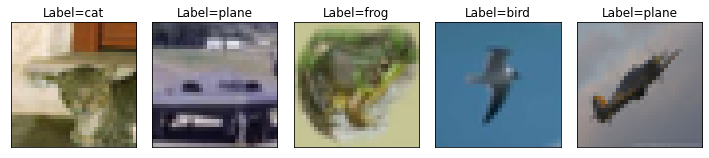

In [0]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

# Prediction of sampe test set

In [0]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:   ship  ship  bird  bird   cat


# Plotting Train & Test Accuracy/Losses

Text(0.5, 1.0, 'Test Accuracy')

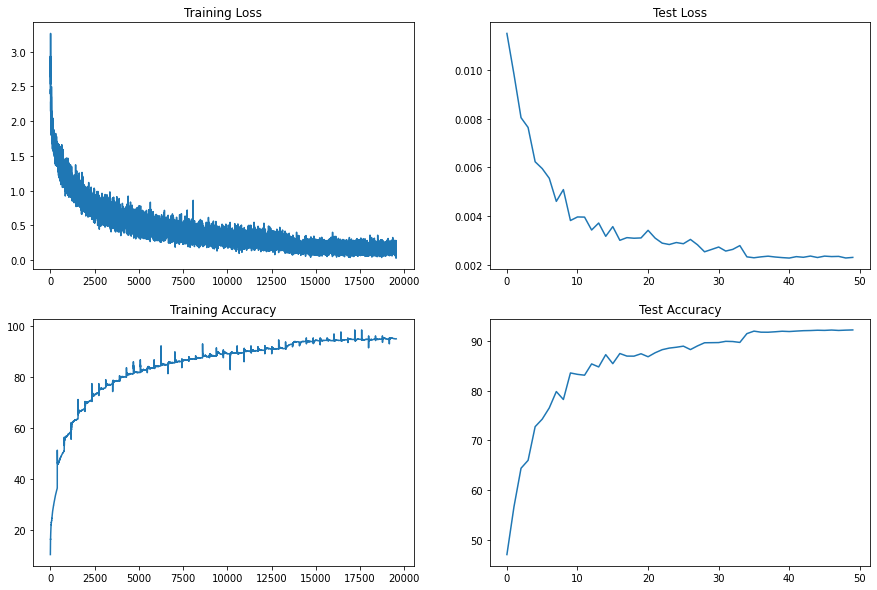

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test.test_acc)
axs[1, 1].set_title("Test Accuracy")

In [0]:
def plot_misclassified_images(model, device, dataloader):

    counter=1
    fig = plt.figure(figsize=(10, 10))
    for data, target in dataloader:
        data, target = data.to(device), target.to(device)
                              
        output = model(data)
        # convert output probabilities to predicted class
        _, preds = torch.max(output, 1)
        images = denormalize(data,mean=(0.4914, 0.4822, 0.4465),std=(0.2023, 0.1994, 0.2010)).cpu().numpy()

        
        #print(np.arange(len(preds.cpu().numpy())))

        

        for idx in np.arange(len(preds.cpu().numpy())):
          if counter < 26:
            if preds[idx]!=target[idx]:
                ax = fig.add_subplot(5, 5, counter, xticks=[], yticks=[])

                img = images[idx]
                npimg = np.transpose(img,(1,2,0))
                ax.imshow(npimg, cmap='gray')
                ax.set_title("act={}\npred={}".format(str(classes[target[idx].item()]), str(classes[preds[idx].item()])),
                            color= "red")
            
                counter+=1
          else:
            break
            
    fig.tight_layout()  
    plt.show()

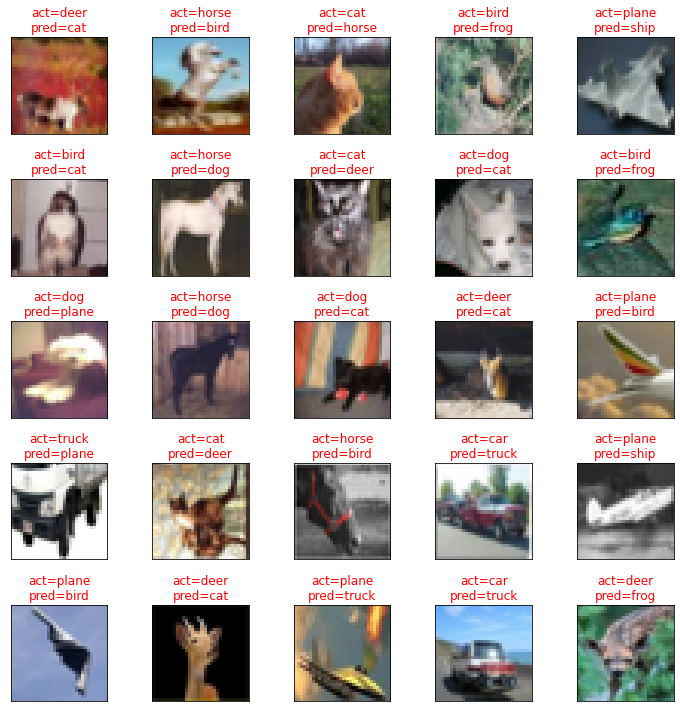

In [78]:
plot_misclassified_images(net,device,testloader)

In [0]:
def plot_misclassified_images_w_gradcam(model, device, dataloader):

    # initialize a model, model_dict and gradcam
    resnet = model
    resnet.eval()
    gradcam = GradCAM.from_config(model_type='resnet', arch=resnet, layer_name='layer4')


    counter=1
    fig = plt.figure(figsize=(15, 10))
    for data, target in dataloader:
        images, labels = data.to(device), target.to(device)
                              
        output = model(images)
        # convert output probabilities to predicted class
        _, preds = torch.max(output, 1)
        #images = denormalize(data,mean=(0.4914, 0.4822, 0.4465),std=(0.2023, 0.1994, 0.2010)).cpu().numpy()

        for idx in np.arange(len(preds.cpu().numpy())):
          if counter < 51:
            if preds[idx]!=target[idx]:
                

                img = images[idx]
                lbl = labels.cpu().numpy()[idx]

                # get an image and normalize with mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
                img = img.unsqueeze(0).to(device)
                org_img = denormalize(img,mean=(0.4914, 0.4822, 0.4465),std=(0.2023, 0.1994, 0.2010))

                # get a GradCAM saliency map on the class index 10.
                mask, logit = gradcam(img, class_idx=lbl)

                ax = fig.add_subplot(5, 10, counter, xticks=[], yticks=[])
                npimg = np.transpose(org_img[0].cpu().numpy(),(1,2,0))
                ax.imshow(npimg, cmap='gray')
                ax.set_title("Label={}".format(str(classes[lbl])))
                counter+=1

                ax = fig.add_subplot(5, 10, counter, xticks=[], yticks=[])
                # make heatmap from mask and synthesize saliency map using heatmap and img
                heatmap, cam_result = visualize_cam(mask, org_img, alpha=0.4)
                npimg = np.transpose(cam_result,(1,2,0))
                ax.imshow(npimg, cmap='gray')
                ax.set_title("pred={}".format(str(classes[preds[idx].item()])),
                            color= "red")
                

            
                counter+=1
          else:
            break
            
    fig.tight_layout()  
    plt.show()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


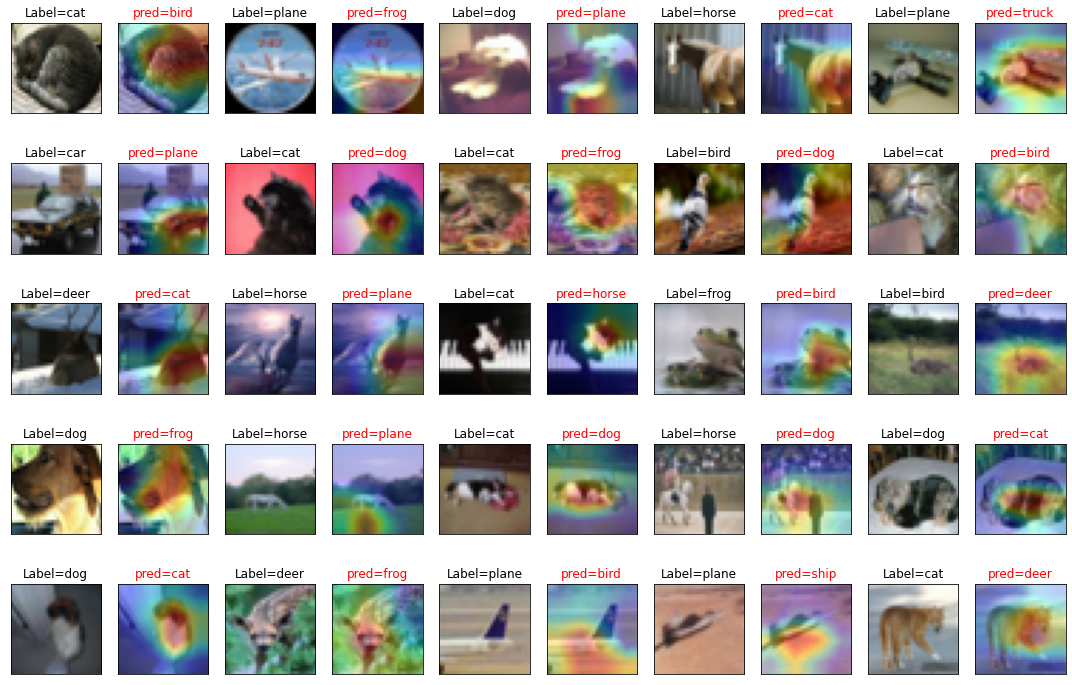

In [82]:
plot_misclassified_images_w_gradcam(net,device,testloader)

# Evaluating test Accuracy over different classes 

In [63]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 90 %
Accuracy of   cat : 82 %
Accuracy of  deer : 92 %
Accuracy of   dog : 88 %
Accuracy of  frog : 100 %
Accuracy of horse : 88 %
Accuracy of  ship : 100 %
Accuracy of truck : 97 %


Files already downloaded and verified


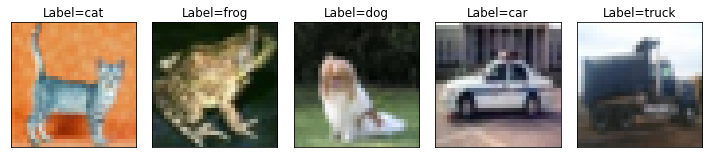

In [25]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

In [0]:
# initialize a model, model_dict and gradcam
resnet = net
resnet.eval()
gradcam = GradCAM.from_config(model_type='resnet', arch=resnet, layer_name='layer4')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


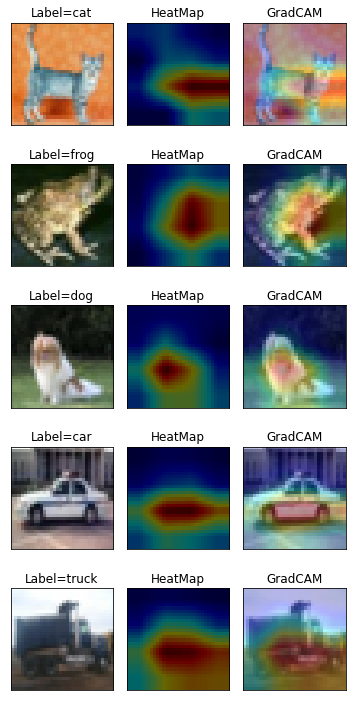

In [31]:
fig = plt.figure(figsize=(5, 10))
idx_cnt=1
for idx in np.arange(len(labels.numpy())):

  img = images[idx]
  lbl = labels.numpy()[idx]

  # get an image and normalize with mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
  img = img.unsqueeze(0).to(device)
  org_img = denormalize(img,mean=(0.4914, 0.4822, 0.4465),std=(0.2023, 0.1994, 0.2010))

  # get a GradCAM saliency map on the class index 10.
  mask, logit = gradcam(img, class_idx=lbl)
  # make heatmap from mask and synthesize saliency map using heatmap and img
  heatmap, cam_result = visualize_cam(mask, org_img, alpha=0.4)

  # Show images
  # for idx in np.arange(len(labels.numpy())):
  # Original picture
  ax = fig.add_subplot(5, 3, idx_cnt, xticks=[], yticks=[])
  npimg = np.transpose(org_img[0].cpu().numpy(),(1,2,0))
  ax.imshow(npimg, cmap='gray')
  ax.set_title("Label={}".format(str(classes[lbl])))
  idx_cnt+=1

  ax = fig.add_subplot(5, 3, idx_cnt, xticks=[], yticks=[])
  npimg = np.transpose(heatmap,(1,2,0))
  ax.imshow(npimg, cmap='gray')
  ax.set_title("HeatMap")
  idx_cnt+=1

  ax = fig.add_subplot(5, 3, idx_cnt, xticks=[], yticks=[])
  npimg = np.transpose(cam_result,(1,2,0))
  ax.imshow(npimg, cmap='gray')
  ax.set_title("GradCAM")
  idx_cnt+=1

fig.tight_layout()  
plt.show()

In [0]:
def plot_train_test_acc_loss(train,test):
    
    
    fig, axs = plt.subplots(2,1,figsize=(10,10))
    x = np.linspace(0.0, 50.0, num=len(train.train_losses))

    axs[0].plot(x,train.train_losses, label='Training')
    axs[0].set_ylabel("Training Loss", fontsize=16)
    axs[0].tick_params(axis='y', labelsize=14)
    axs[0].tick_params(axis='x', labelsize=14)


    axs[1].plot(x,train.train_acc)
    axs[1].set_ylabel("Accuracy", fontsize=16)
    axs[1].set_xlabel("Epoch", fontsize=16)
    axs[1].tick_params(axis='y',  labelsize=14)
    axs[1].tick_params(axis='x',  labelsize=14)

    color = 'tab:red'
    axs0_sec = axs[0].twinx() 
    x = np.linspace(0.0, 50.0, num=len(test.test_losses))

    axs0_sec.plot(x,test.test_losses, color=color,label='Test')
    

    axs0_sec.set_ylabel("Test Loss", fontsize=16, color=color)
    axs0_sec.tick_params(axis='y', labelcolor=color, labelsize=14)


    #axs1_sec = axs[1].twinx() 
    axs[1].plot(x,test.test_acc, color=color)

    plt.legend()
    plt.tight_layout()
    plt.show()

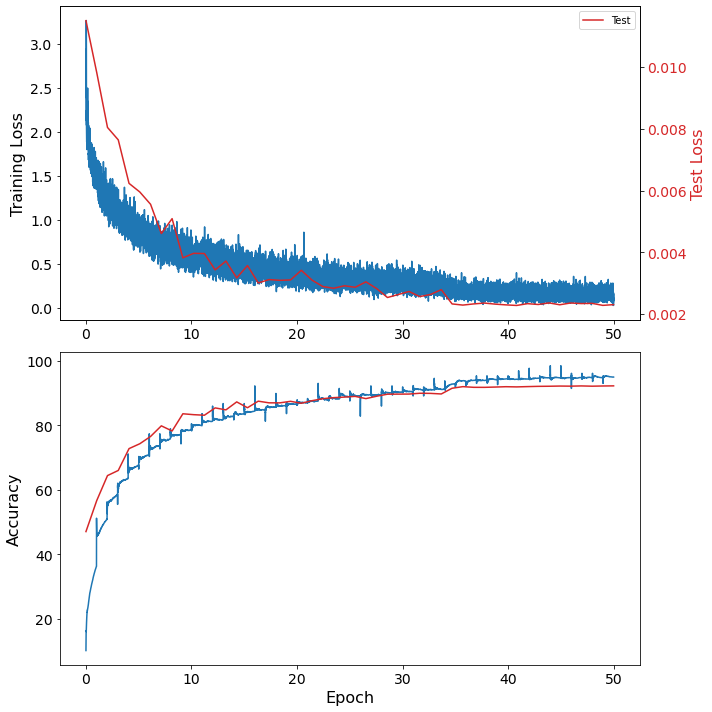

In [174]:
plot_train_test_acc_loss(train,test)